In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

In [2]:
iris = load_iris()
sepal_length = iris.data[:, 0]
petal_width = iris.data[:, 3]
target = iris.target

species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_name = [species_dict[i] for i in target]

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.iterations = 10_000
        self.learning_rate = 0.01
        self.intercept = 0
        self.coefficient = 0
        self.X = np.array([])
        self.y = np.array([])
        self.length = 0
        self.loss_history = list()
        self.intercept_history = list()
        self.coefficient_history = list()

    def _intercept(self):
        return self.intercept

    def _coefficient(self):
        return self.coefficient

    def _loss_history(self):
        return self.loss_history
    
    def _intercept_history(self):
        return self.intercept_history
    
    def _coefficient_history(self):
        return self.coefficient_history

    def mean_squared_error(self, predictions):
        return np.sum(np.square(predictions - self.y)) / self.length

    def predict(self, X):
        return self.intercept + self.coefficient * X

    def update_params(self, predictions):
        error = predictions - self.y
        self.intercept -= self.learning_rate * np.sum(error) / self.length
        self.intercept_history.append(self.intercept)
        self.coefficient -= self.learning_rate * np.sum(error * self.X) / self.length
        self.coefficient_history.append(self.coefficient)

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.length = len(self.y)

        for _ in range(self.iterations):
            predictions = self.predict(self.X)
            self.update_params(predictions)
            self.loss_history.append(self.mean_squared_error(predictions))

lin_reg = LinearRegression()
lin_reg.fit(sepal_length, petal_width)

In [4]:
intercept_range = np.linspace(-3, 1, 150)
coefficient_range = np.linspace(-1, 1, 150)
intercept_grid, coefficient_grid = np.meshgrid(intercept_range, coefficient_range)

# Calculate y_pred for all combinations of W0 and W1 at once
y_pred = intercept_grid + coefficient_grid * sepal_length.reshape(-1, 1, 1)

# Calculate MSE for all combinations of W0 and W1 at once
MSE = np.mean((petal_width.reshape(-1, 1, 1) - y_pred) ** 2, axis=0)

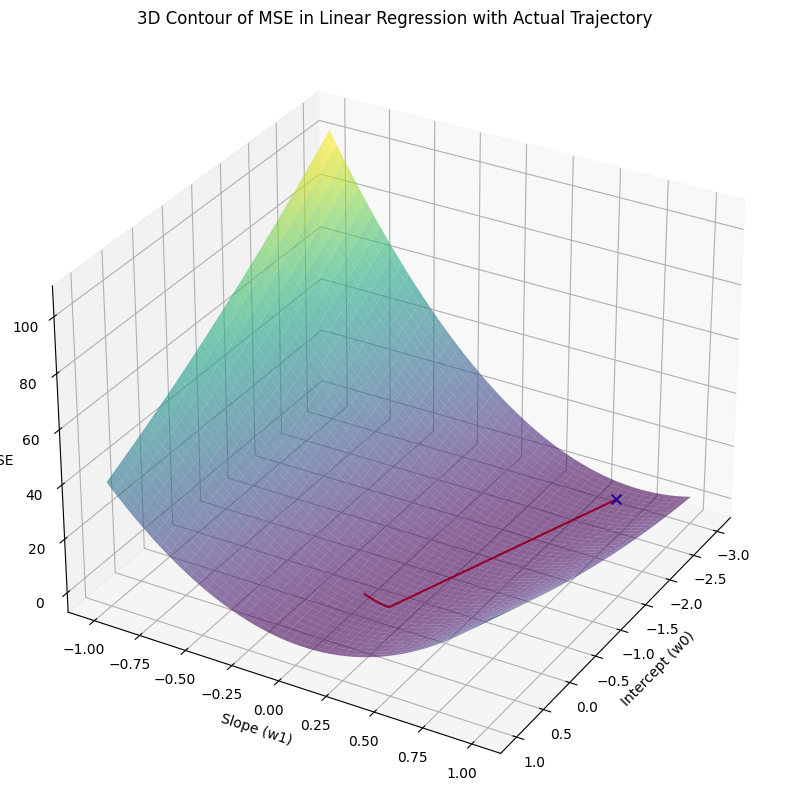

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(intercept_grid, coefficient_grid, MSE, cmap='viridis', alpha=0.6)
ax.plot(lin_reg.intercept_history, lin_reg.coefficient_history, lin_reg.loss_history, color='r')
ax.scatter(lin_reg.intercept_history[-1], lin_reg.coefficient_history[-1], lin_reg.loss_history[-1], color='b', marker='x', s=50)
ax.set_xlabel('Intercept (w0)')
ax.set_ylabel('Slope (w1)')
ax.set_zlabel('MSE')
ax.set_title('3D Contour of MSE in Linear Regression with Actual Trajectory')
ax.view_init(30, 30)
plt.show()